In [ ]:
# Sentiment analysis for twitter parse

In [1]:
# import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# load data
log = pd.read_csv('Login.csv')

In [4]:
log.head()

,key
0,7g7VPBXzWOmlckeim3JS3puYs
1,d61MmLPQWJ2gqqeQupI5bWJfPkkVXwVhFxY3bCUU410VaY...
2,398725192-ExRnFewjw7lGrrB262UnYs2qXMGomshLDL5n...
3,V1ksIDt92IlpXG8xugLL9FljyTEQcmHDqbgPq74mokYDa


In [5]:
# Twitter cerdintials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [6]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [7]:
# Exreact 100 tweets form the twitter user
posts = api.user_timeline(screen_name = "sundarpichai", count = 100, lang = "en", tweet_mode = "extended")

# Print the last 5 tweets from the account
print("Show the last 5 tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i+1

Show the last 5 tweets: 

1)@conradtribble @maryamm Yes. We've been carbon neutral since 2007 (incl all our offices &amp; data centers globally), and will continue to be as we grow.

2)Today I’m pleased to announce that Google will invest more than $10 billion in offices and data centers across the U.S in 2020, creating more opportunities in communities from Massachusetts to Texas. 
https://t.co/zyW4a8l52Z

3)RIP Katherine Johnson, inspiring mathematician, leader and trailblazer. https://t.co/qV1XW1TAhD

4)A big welcome to the winning teams of our @GoogleAI Impact Challenge visiting the Bay Area this week! Really inspiring to learn about how they're using AI for social good, addressing issues in health, education, accessibility, the environment and more. https://t.co/zZoLIQfrJh https://t.co/JzZb584k7H

5)축하합니다 Bong Joon-ho and the cast of @ParasiteMovie on a historic and well-deserved win. Really enjoyed watching it 🇰🇷🎥



In [8]:
#Create a Dataframe with a colum called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,@conradtribble @maryamm Yes. We've been carbon...
1,Today I’m pleased to announce that Google will...
2,"RIP Katherine Johnson, inspiring mathematician..."
3,A big welcome to the winning teams of our @Goo...
4,축하합니다 Bong Joon-ho and the cast of @ParasiteMo...


In [9]:
#Clean the text data

#Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removing @ symbols
  text = re.sub(r'#', '', text) #Removing '#' symbols
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Removing hyper links

  return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,Yes. We've been carbon neutral since 2007 (i...
1,Today I’m pleased to announce that Google will...
2,"RIP Katherine Johnson, inspiring mathematician..."
3,A big welcome to the winning teams of our Imp...
4,축하합니다 Bong Joon-ho and the cast of on a histo...
...,...
95,"Congrats , always admired your product focus a..."
96,"_Wiener Thanks, _Wiener. We look forward to w..."
97,Glad to do our part to support our future ne...
98,Thank you Congressman Khanna for your support...


In [10]:
# Create a function to get a Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Craete a funtion to get a Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create 2 new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [11]:
# Show the new dataframes with new columns
df

,Tweets,Subjectivity,Polarity
0,Yes. We've been carbon neutral since 2007 (i...,0.000000,0.000000
1,Today I’m pleased to announce that Google will...,0.666667,0.500000
2,"RIP Katherine Johnson, inspiring mathematician...",1.000000,0.500000
3,A big welcome to the winning teams of our Imp...,0.559524,0.451190
4,축하합니다 Bong Joon-ho and the cast of on a histo...,0.366667,0.433333
...,...,...,...
95,"Congrats , always admired your product focus a...",0.000000,0.375000
96,"_Wiener Thanks, _Wiener. We look forward to w...",0.200000,0.200000
97,Glad to do our part to support our future ne...,0.562500,0.250000
98,Thank you Congressman Khanna for your support...,0.000000,0.000000


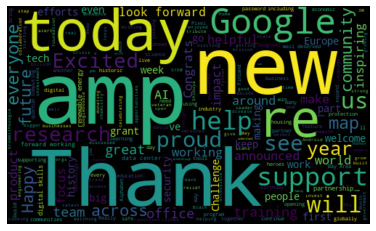

In [12]:
# Plot the word colud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [13]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Yes. We've been carbon neutral since 2007 (i...,0.000000,0.000000,Neutral
1,Today I’m pleased to announce that Google will...,0.666667,0.500000,Positive
2,"RIP Katherine Johnson, inspiring mathematician...",1.000000,0.500000,Positive
3,A big welcome to the winning teams of our Imp...,0.559524,0.451190,Positive
4,축하합니다 Bong Joon-ho and the cast of on a histo...,0.366667,0.433333,Positive
...,...,...,...,...
95,"Congrats , always admired your product focus a...",0.000000,0.375000,Positive
96,"_Wiener Thanks, _Wiener. We look forward to w...",0.200000,0.200000,Positive
97,Glad to do our part to support our future ne...,0.562500,0.250000,Positive
98,Thank you Congressman Khanna for your support...,0.000000,0.000000,Neutral


In [14]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) Today I’m pleased to announce that Google will invest more than $10 billion in offices and data centers across the U.S in 2020, creating more opportunities in communities from Massachusetts to Texas. 


2) RIP Katherine Johnson, inspiring mathematician, leader and trailblazer. 

3) A big welcome to the winning teams of our  Impact Challenge visiting the Bay Area this week! Really inspiring to learn about how they're using AI for social good, addressing issues in health, education, accessibility, the environment and more.  

4) 축하합니다 Bong Joon-ho and the cast of  on a historic and well-deserved win. Really enjoyed watching it 🇰🇷🎥

5) We’re proud to invest in products &amp; partnerships that help people in Europe succeed. Our new economic impact report estimates that Google’s tools created €177B in economic activity for businesses, developers, creators &amp; publishers across Europe in 2019. 


6)   Thanks,  had a lot to do with this:)

7) Happy 15th Birthday ! Reflecting today on som

In [15]:
# Print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j=j+1

1)Devastating to see the catastrophic bushfires in Australia - we’ve been working with emergency services to provide SOS alerts &amp; info on our crisis map, and  &amp; Googlers are donating to support relief efforts. 


2)This year, searches for heroes — both superheroes and everyday heroes — soared around the world. Thank you to all of the heroes who inspired us to go further and dream bigger in 2019.  

3)We've joined 55+ other orgs and industry groups to support the STEM OPT program, another step in our efforts to advocate for comprehensive immigration reform in the U.S. 

4)US Army veteran Pete Damon is the guest artist behind today's GoogleDoodle. This VeteransDay, we join him in paying tribute to all of you who have served and sacrificed for our country.




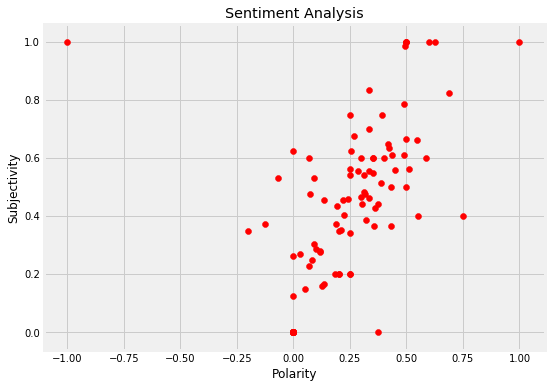

In [16]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color= 'Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

77.0

In [18]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

4.0

In [19]:
# Get the percentage of neutral tweets
nutweets = df[df.Analysis == 'Neutral']
nutweets = nutweets['Tweets']

round((nutweets.shape[0] / df.shape[0]) * 100,1)

19.0

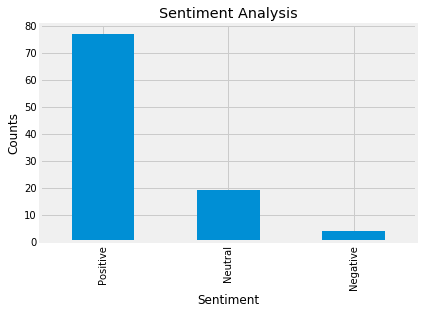

In [20]:
# Show the value counts

df['Analysis'].value_counts()

# Plot and visualize the count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()